# Mode visualization (simple example)
In this example, a simple traffic sign is visualized using the spatial plotting tools in KOMA and a synthetic displacement definition (mode shape). Note that the example showing visualization of a shear frame is more describing; not all details are fully described in the current example.

In [1]:
from koma import spatial as sp
import numpy as np
import pyvista as pv
from koma.modal import normalize_phi
import matplotlib.pyplot as plt

pv.set_jupyter_backend('trame') # for interactive plots in notebook

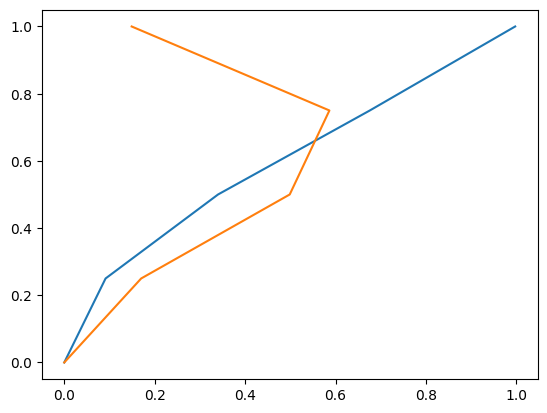

In [2]:
# Define synthetic mode shapes
z = np.linspace(0,1,5)
mode1 = np.sin((np.pi/2)/1.05*z)
mode2 = np.sin(2*(np.pi/2)/1.05*z)

# Mimic fixed ground connection
mode1[1:] = mode1[1:]*z[1:]
mode2[1:] = mode2[1:]*z[1:]

plt.plot(np.vstack([mode1, mode2]).T, z);

## Defining system

### Either using classes directly:

In [3]:
# Node(2, 0, 3, 0) creates a node labeled 2 with coordinates (x, y, z) = (0, 3, 0)
nodes = [
    # GROUND 
    sp.Node(1, 0, 0, 0),
    
    # POST
    sp.Node(2, 0, 0, 0.5),
    sp.Node(3, 0, 0, 1.0),
    sp.Node(4, 0, 0, 1.5),
    sp.Node(5, 0, 0, 2.0), 
    
    # SIGN
    sp.Node(101, 0, 0.3, 2.0),
    sp.Node(102, 0, -0.3, 2.0),
    sp.Node(103, 0, 0.3, 2.6),
    sp.Node(104, 0, -0.3, 2.6), 
    ]

# Element([1,5], label=2) creates a line element labeled 2 between nodes with labels 1 and 5
# Element([5, 6, 7], label=101) creates a triangle element labeled 101 between nodes 5, 6 and 7
# Note that the label definition is optional, as element labels are not really important for the purpose (node labels are)

E = sp.Element # to make assignments below more compact
elements = [E([1,2]), 
            E([2,3]),
            E([3,4]), 
            E([4,5]), 
            
            E([101,102,103]), 
            E([102,103,104])]

model = sp.Model(nodes, elements)
model.plot(background_plotter=False, perspective_cam=False, node_labels=True) #background_plotter=False is needed in Jupyter Notebook

Widget(value='<iframe src="http://localhost:51802/index.html?ui=P_0x1bbd696fa10_0&reconnect=auto" class="pyvis…

In [4]:
dofmap = {1: [None, None, None], # Fixed at bottom
          2: [1, None, None],    # node 2 grabs dof with index 1 from phi for x-displacement
          3: [2, None, None],    # node 3 grabs dof with index 2 from phi for x-displacement
          4: [3, None, None],    # node 4 grabs dof with index 3 from phi for x-displacement
          5: [4, None, None],    # node 5 grabs dof with index 4 from phi for x-displacement
          103: [sp.Rel(fun = lambda n: n(5,0) + (n(5,0) - n(4,0))), None,  None]
}

sensors = {'acc1': 2, 'acc2': 3, 'acc3': 4, 'acc4':5}    # just for plotting

model = sp.Model(nodes, elements, sensors=sensors, dofmap=dofmap, undefined_dofs='linear', interpolation_axes=[2])

model.plot(background_plotter=False, perspective_cam=False,
           plot_sensor_nodes=True, sensor_labels=True)

Widget(value='<iframe src="http://localhost:51802/index.html?ui=P_0x1bbde41d590_1&reconnect=auto" class="pyvis…

In [5]:
#%% Plot mode shape mapped on model: MODE 1
model.u = mode1*0.5

pl = model.plot(deformed=False, plot_sensor_nodes=True, plot_nodes=False,
            line_settings={'opacity':0.3}, face_settings={'opacity': 0.3, 'show_edges':False},
             perspective_cam=False, background_plotter=False, show=False)

model.plot(pl=pl, deformed=True, perspective_cam=False, sensor_labels=True, background_plotter=False, show=True)

Widget(value='<iframe src="http://localhost:51802/index.html?ui=P_0x1bbd8b21310_2&reconnect=auto" class="pyvis…

In [6]:
#%% Plot mode shape mapped on model: MODE 2
model.u = mode2*0.5

pl = model.plot(deformed=False, plot_sensor_nodes=True, plot_nodes=False,
            line_settings={'opacity':0.3}, face_settings={'opacity': 0.3, 'show_edges':False},
             perspective_cam=False, background_plotter=False, show=False)

model.plot(pl=pl, deformed=True, perspective_cam=False, sensor_labels=True, background_plotter=False, show=True)

Widget(value='<iframe src="http://localhost:51802/index.html?ui=P_0x1bbd697ccd0_3&reconnect=auto" class="pyvis…

In [10]:
## Animate mode 2
model.animate_mode(mode2*0.5, background_plotter=True)

SystemExit: 

In [16]:
## Animate mode 2, save to gif
model.animate_mode(mode2*0.5, fps=60, add_undeformed=True, filename='mode2_exported.gif', f=1.5)

Widget(value='<iframe src="http://localhost:51802/index.html?ui=P_0x1bbde41efd0_4&reconnect=auto" class="pyvis…